<a href="https://colab.research.google.com/github/ChaelinL/DataAnalysis_Study/blob/main/%EC%9D%B4%EC%B1%84%EB%A6%B007_0326_%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석 기초반 4주차 과제1
- method 보간법을 사용 (다양한 보간법을 최소 7개 이상)
- 1. 개념 설명: 위에 나온 방법이 어떤 방법인지?
- 2. 실제 위에 에볼라 데이터를 이용한 코드를 작성하고 보간법 방법들을 비교해주세요. (시각화, 평균 확인)

In [1]:
import numpy as np
import pandas as pd
import missingno as msno

In [2]:
# ebola 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

ebola = pd.read_csv('/content/drive/My Drive/country_timeseries.csv')
ebola

Mounted at /content/drive


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

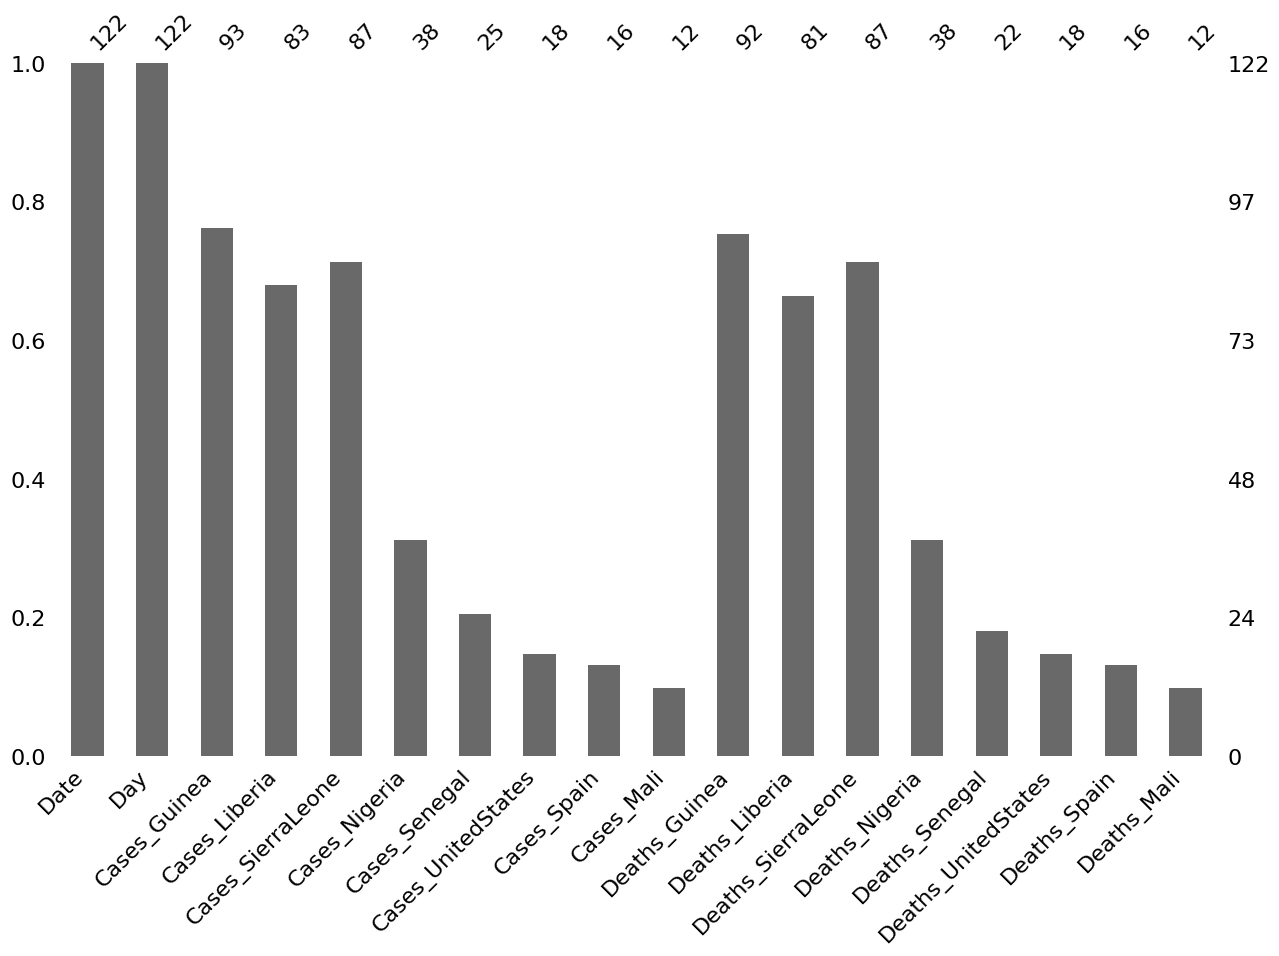

In [3]:
# na값의 분포 확인
msno.bar(df = ebola, figsize=(15,9))

- 결측값이 70% 이상인 열은 제외하고, Cases_Guinea 열을 선택해 보간법을 시행

<Axes: >

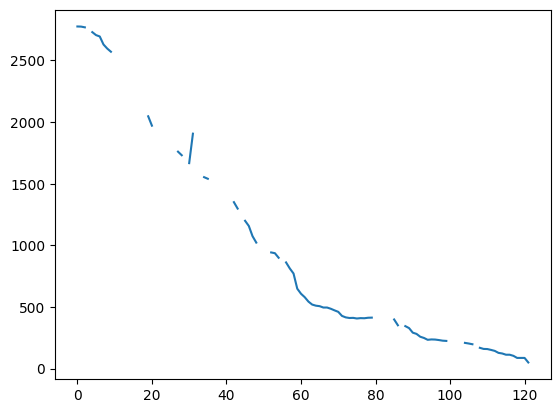

In [4]:
# 값 분포 시각화
ebola['Cases_Guinea'].plot()

In [5]:
# 결측치 포함 평균 확인
ebola['Cases_Guinea'].mean()

911.0645161290323

In [6]:
# 평균으로 결측치 대체하는 경우 평균 확인
ebola['Cases_Guinea'].fillna(911).mean()

911.0491803278688

<Axes: >

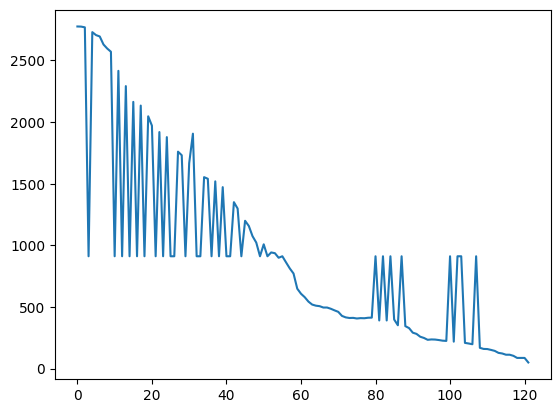

In [25]:
# 평균으로 결측치 대체하는 경우 시각화
ebola['Cases_Guinea'].fillna(911).plot()

**1. 선형 보간법(linear)**
- 알고자 하는 함수가 직선의 함수라고 가정하고 함수값 추정
- 두 점의 값이 주어졌을 때 그 사이에 위치한 값을 추정에 따라 선형적으로 계산
- interpolate()의 디폴트값


In [7]:
ebola['Cases_Guinea'].interpolate(method='linear').mean()

1014.4344262295082

<Axes: >

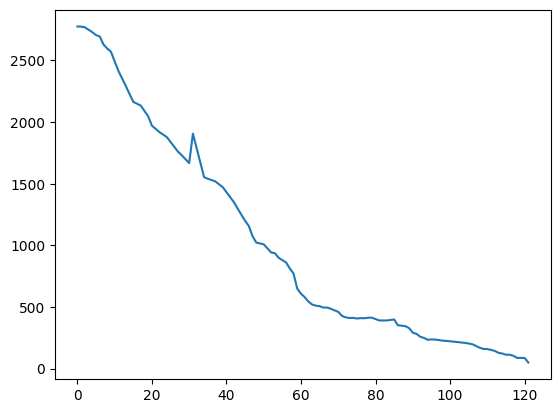

In [8]:
ebola['Cases_Guinea'].interpolate(method='linear').plot()

**2. 최근방 이웃 보간법 (nearest)**
- 결측치의 가장 근처의 값을 가져와 결측치를 대체한다

In [9]:
ebola['Cases_Guinea'].interpolate(method='nearest').mean()

1018.7868852459017

<Axes: >

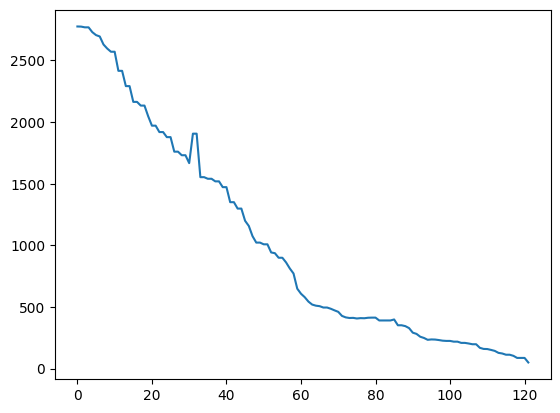

In [10]:
ebola['Cases_Guinea'].interpolate(method='nearest').plot()

**3. 스플라인 보간법**
- 각 구간에서 낮은 수준의 다항식을 사용
- 직선으로 연결되는 것보단 좀 더 부드럽게 연결된다

In [11]:
ebola['Cases_Guinea'].interpolate(method='quadratic').mean()

1015.3702769069504

<Axes: >

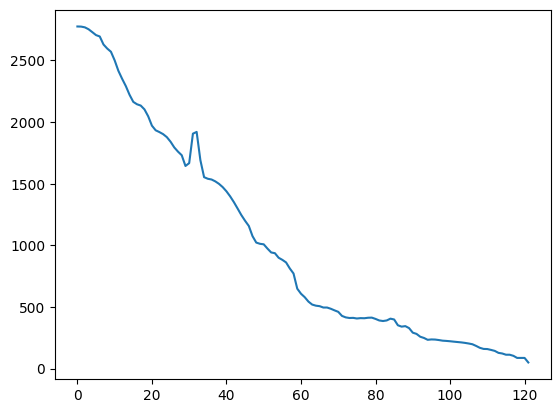

In [12]:
ebola['Cases_Guinea'].interpolate(method='quadratic').plot()

**4. zero 보간법**
- 0으로부터의 거리를 이용하여 선형 보간하는 방법
- 결측치를 0으로 대체한다

In [13]:
ebola['Cases_Guinea'].interpolate(method='zero').mean()

1023.7295081967213

<Axes: >

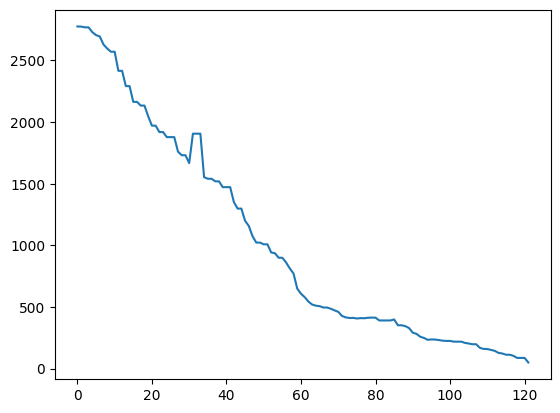

In [14]:
ebola['Cases_Guinea'].interpolate(method='zero').plot()

**5. values 보간법**
- 배열의 값들을 이용하여 선형 보간하는 방법


In [24]:
ebola['Cases_Guinea'].interpolate(method='values').mean()

1014.4344262295082

<Axes: >

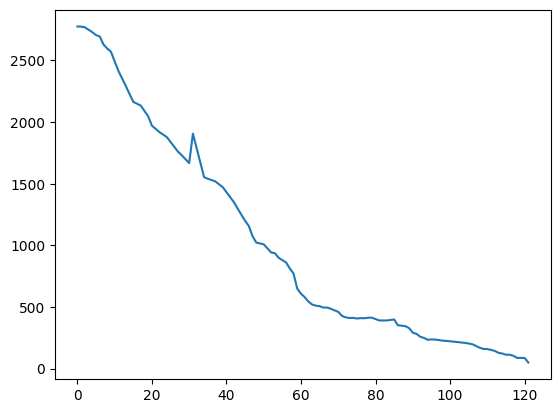

In [16]:
ebola['Cases_Guinea'].interpolate(method='values').plot()

**6. cubic 보간법**
- 세 점을 이용하여 보간하는 방법
- 구간 내에서 곡률이 일정하게 유지된다

In [18]:
ebola['Cases_Guinea'].interpolate(method='cubic').mean()

1015.414284225934

<Axes: >

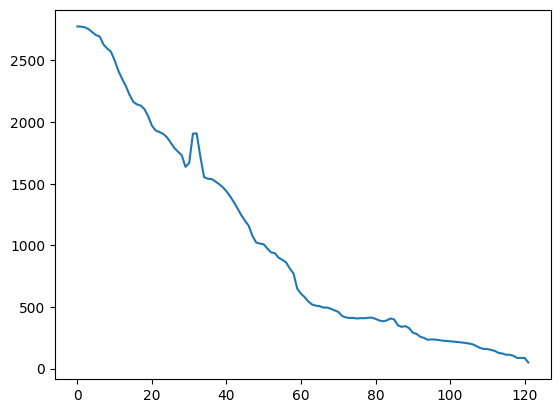

In [19]:
ebola['Cases_Guinea'].interpolate(method='cubic').plot()

**7. pchip 보간법 (Piecewise Cubic Hermite Interpolating Polynomial)**
- 데이터의 부드러운 변화를 유지하면서 구간마다 다항식으로 보간하는 방법

In [21]:
ebola['Cases_Guinea'].interpolate(method='pchip').mean()

1014.683734771015

<Axes: >

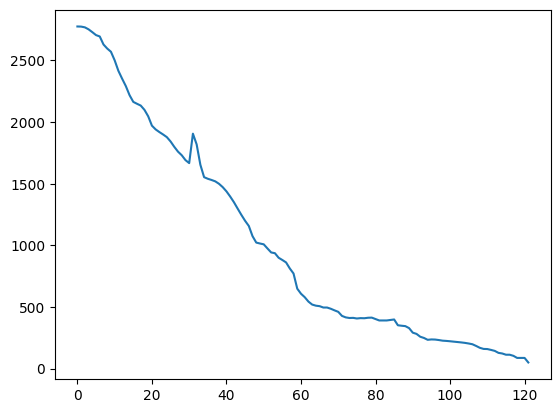

In [22]:
ebola['Cases_Guinea'].interpolate(method='pchip').plot()